<h1><center>DS200 - Lab 4: Classification Methods</center></h1>

## Introduction:

In this lab, we will be working with the famous iris dataset from UCI data repository for classification!

+ Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

+ Predicted attribute: class of iris plant. 


+ Attribute Information:

    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 
    5. class: 
        + Iris Setosa 
        + Iris Versicolour 
        + ris Virginica



![iris dataset](https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png)

## Q1 (10'): Import Libraries and Load the Data.

#### Import all necessary libraies (numpy, pandas, matplotlib and seaborn) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Firstly, import the Iris dataset from the Scikit-learn built-in datasets into a dictionary variable - `iris_dict`. And then create a DataFrame - `iris` with all the features from `iris_dict`. Finally, add in a new `species` column to the `iris` DataFrame as the label column. 

*(Review the python notebook for an example on the Boston Housing dataset if you forget how to do it.)*

In [2]:
# Run this line to load the dictionary

from sklearn.datasets import load_iris
iris_dict = load_iris()

In [3]:
iris_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_dict['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_dict['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_dict['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Create the iris DataFrame from iris_dict
# Must supply the given feature names as the column names to the DataFrame

iris = pd.DataFrame(data=iris_dict['data'], columns=iris_dict['feature_names'])


In [8]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Generate the label column 'speices' for the iris DataFrame

iris['species'] = iris_dict['target']


#### Show the first 5 rows from your DataFrame

In [10]:
iris.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Show the basic statistics.

In [11]:
iris.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Q2 (20'): Exploratory Data Analysis

<AxesSubplot:ylabel='species'>

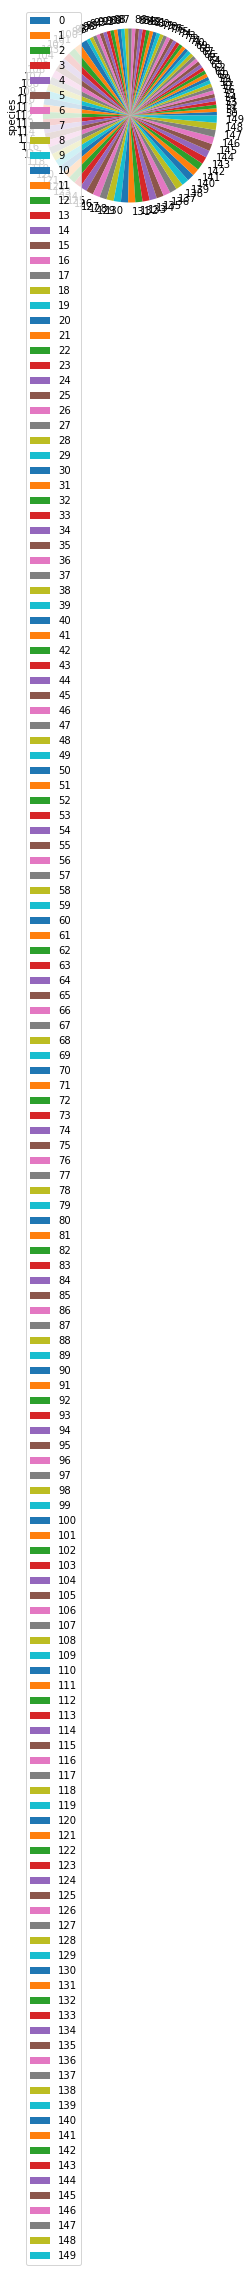

In [14]:
iris.plot(kind='pie', y='species')

#### Recreate the following plots. Use the x, y-axes as the hint for the graph type. 

#### Visualize the count to each label.

<AxesSubplot:xlabel='species', ylabel='count'>

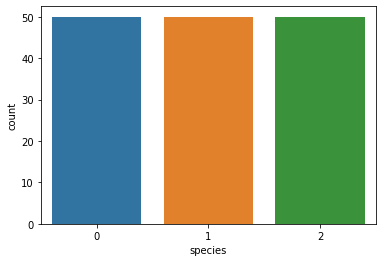

In [13]:
sns.countplot(data = iris, x = 'species')

#### Visualize 'sepal length (cm)' versus 'sepal width (cm)' across the 3 different species.

In [14]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

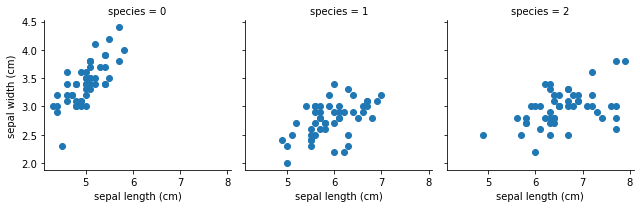

In [15]:
g = sns.FacetGrid(data = iris, col = 'species')
g.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')



#### Find the data distribution for each feature column. Note the x-axis labels for each subplot.

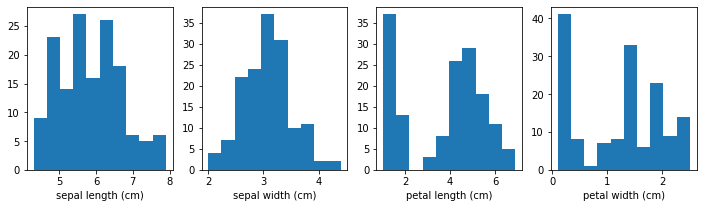

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (12, 3))

for i in range(4):
    axs[i].hist(x = iris.iloc[:, i])
    axs[i].set_xlabel(iris.columns[i])
    
    
    
    
    

#### Visualize pair-wise relationship for all feature columns. Use the label column `species` to color-code. 

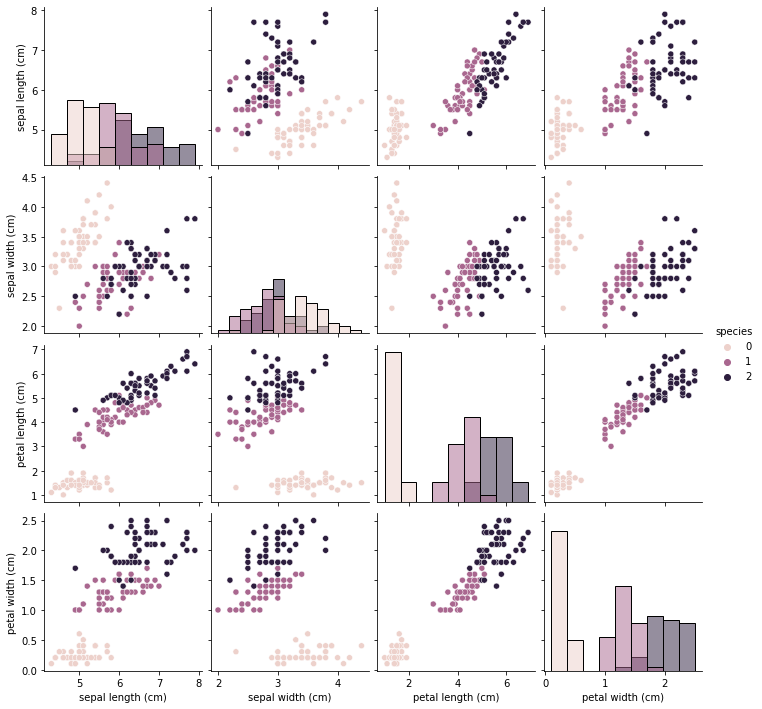

In [17]:
sns.pairplot(data = iris, diag_kind ='hist', hue='species')



## Q3 (20'): Data Cleaning

#### Now let's deliberately change some data from the `patel width (cm)` column into `np.nan`.

In [18]:
# Run the following code to make the change.

iris.loc[2:5, 'petal width (cm)'] = np.nan
iris.loc[78:83, 'petal width (cm)']= np.nan
iris.loc[134:138, 'petal width (cm)'] = np.nan

#### Visualize the missing data using heatmap

<AxesSubplot:>

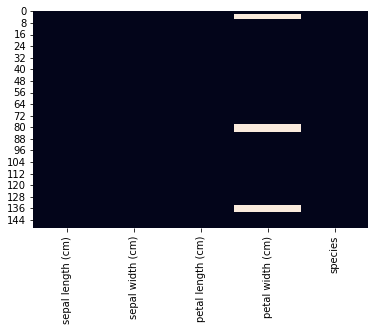

In [19]:
sns.heatmap(data=iris.isnull(), cbar=False)



#### Now let's impute the missing data with some reasonable values. Firstly, let's make a function `impute_pwidth()` that returns a petal width value based on the species. 
+ If the species is 0, return 0.4; 
+ If the species is 1, return 1.3;
+ If the species is 2, return 2.0. 

In [20]:
def impute_pwidth (cols):
    pwidth = cols[0]
    spec = cols[1]
    
    if pd.isnull(pwidth):
        if spec == 0:
            return 0.4
        elif spec == 1:
            return 1.3
        else:
            return 2.0
    else:
        return pwidth
            

#### Now use the `impute_pwidth()` function to fix the missing data from `petal width (cm)` column. 

In [21]:
iris['petal width (cm)'] = iris[['petal width (cm)','species']].apply(impute_pwidth, axis = 1)

#### Now let's check with the heatmap again to ensure it's fixed.

<AxesSubplot:>

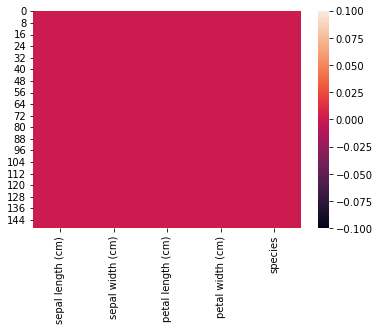

In [22]:

sns.heatmap(data=iris.isnull())


## Q4 (10'): Data Splitting and Standardization

#### Create your feature matrix X and label vector y. 

In [161]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [162]:
X = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]



In [163]:
y = iris['species']



#### Split the feature data and label data into two parts: training and testing. Your training size should be 80% of the entire dataset, and use the random seed as 101.

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=101)


#### Standardize the `X_train` and `X_test` with StandardScaler. Only use the training set `X_train` for fitting. 

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()

In [168]:


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Q5 (10'): Model Training and Prediction

#### Use the LogisticRegression model to fit our training dataset. 

In [169]:
from sklearn.linear_model import LogisticRegression


In [170]:
logmodel = LogisticRegression()


logmodel.fit(X_train, y_train)


LogisticRegression()

#### Then generate the predicated labels with your testing dataset.

In [171]:
predictions = logmodel.predict(X_test)


## Q6 (10'): Model Evaluation

#### First, generate the confusion matrix table to see how many instances are mis-classified.

In [174]:
from sklearn.metrics import confusion_matrix

In [177]:
print(confusion_matrix(predictions, y_test))


[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


#### Then, generate the precision, recall and F-1 score to see how well we did in the modeling.

In [172]:
from sklearn.metrics import classification_report, mean_absolute_error

In [173]:
print(classification_report(y_test, predictions))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Q7 (20'): Model Selection and Hyperparameter Tuning

#### This is an open-ended question. Try other classifiers for the dataset, tune the classifier and compare the result with the logistic regression model.

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
MSE = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    MSE.append(mean_absolute_error(y_test, pred))
    



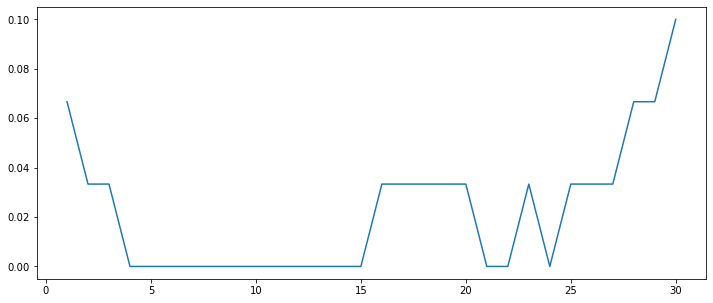

In [182]:
plt.figure(figsize=(12,5))
plt.plot(range(1,31),MSE)

In [183]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [184]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Good job!